# Importing the data

I begin by importing my csv file from Github and creating my pandas Dataframe.  

As there are a number of percentages, I want to convert these to usable numbers and then to integers or floats using a solution I found on Stackoverflow (see Ref 1 in references)

I check df.head() to make sure it has imported ok. 

Using a mix of 'na_values' and the code from stack overflow, the percentages are now converted to decimals. 

I can also see from df.info() that there are some null values and some number values that are classified as objects which I will deal with later.

In [ ]:
import pandas as pd
import re
import decimal
D = decimal.Decimal

def make_parser(cls):
    def parse_commas(text):
        return cls(re.sub(r'[^-+\d.]', '', text))
    return parse_commas

to_int = make_parser(int)
to_decimal = make_parser(D)

df = pd.read_csv('https://raw.githubusercontent.com/oheag2/UCDDataAnalytics/main/work_life.csv', na_values="-", converters={4: to_decimal, 5: to_decimal, 9: to_decimal, 10: to_decimal, 11: to_decimal}, index_col=0)

df.head()

#import my csv file from github and then print the head to make sure it imported ok/looks ok

#create pandas dataframe


In [ ]:
df.info()

#check for object types and null values

# Tidying and cleaning the data

I can see that the 2021 column has a large number of null values and as it doesn't really have any relevance, I decide to drop it.

I then rename my columns to make them easier to use. 

In [63]:
df = df.drop(columns='2021')

In [ ]:
#rename columns to more usable titles and check info to see new titles

df.columns = ["City", "Country", "remotejob_pcnt", "overworked_pcnt", "vacdays_offered", "vacdays_taken", "unemployment", "multjob_pcnt", "inflation_pcnt", "parental_leave", "covid_impact", "covid_support", "healthcare", "mental_healthcare", "inclusivity", "affordability", "happiness", "city_safety", "outdoor_space", "air_qual", "wellness", "total_score"]
df.info()


Here, I convert some of the numeric columns that are classified as type 'object' to numeric values

In [65]:
df[["remotejob_pcnt", "overworked_pcnt", "multjob_pcnt", "inflation_pcnt", "parental_leave"]] = df[["remotejob_pcnt", "overworked_pcnt", "multjob_pcnt", "inflation_pcnt", "parental_leave"]].apply(pd.to_numeric)

Now when I check df.info(), I have all numeric columns as integers or floats as I wanted

In [ ]:
df.info()

Checking for null values, I find 3 in the 'Vacation Days taken column'

In [ ]:
#check for null values

df.isnull().sum()

I decide to find the mean of this column and replace all nulls with it. 

In [68]:
print(df['vacdays_taken'].mean())

15.100000000000005


In [69]:
import numpy as np

df['vacdays_taken'] = df['vacdays_taken'].replace(np.nan, 15.1)

Now when I check isnull, all my nulls are gone. 

In [ ]:
df.isnull().sum()

# Preparation & Analysis

We can pull data from the dataframe by iterating over it, for example if I want to see how many vacation days are offered but also how many are actually taken

In [ ]:
for index, row in df.head().iterrows():
    print(f"{row[1]} gets a minimum of {row[4]} vacation days and takes {row[5]}")

Now, I want to add a new column to my dataframe to categorise each country into a continent

In [72]:
def continent(df):
    if df in ['USA', 'Canada']:
        return 'North America'
    elif df in ['Brazil', 'Argentina', 'Uruguay']:
        return 'South America'
    elif df in ['Germany', 'Norway', 'Ireland', 'Finland', 'Switzerland', 'Denmark', 'Sweden', 'Netherlands', 'UK', 'France', 'Austria', 'Belgium', 'Spain', 'Portugal', 'Hungary', 'Italy']:
        return "Europe"
    elif df in ['Japan', 'Singapore', 'South Korea', 'Hong Kong', 'Thailand', 'Malaysia', 'UAE']:
        return "Asia & Middle East"
    elif df in ['Australia', 'New Zealand']:
        return "Oceania"
    elif df in ['South Africa']:
        return "Africa"

In [73]:
df["continent"] = df['Country'].apply(continent)

Now when I print the first 10 lines of the head of df, I can see my new continent column at the end

In [ ]:
df.head(10)

# Merging dataframes

I also have a dataframe that lists the health aspects of some of the cities in my original database. However as it only contains about the half the cities as my original database, I don't want to use it for all my analysis as I will lose too much data so I am going to create another smaller database for some analysis later on. 

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/oheag2/UCDDataAnalytics/main/healthy_life.csv', na_values="-", converters={3: to_decimal, 4: to_decimal, 11: to_decimal})

df2.head()

I import my csv file, amending any currencies and percentages to decimals and check the head of the data. Then I drop the rank column as this doesn't apply for this dataframe and I rename the columns to more usable titles. 

In [76]:
df2 = df2.drop(columns='Rank')

In [77]:
df2.columns = ["City", "sunshine", "water_cost", "obesity", "life_expect", "poll_index", "hrs_worked", "happiness", "outdoor", "takeaway_locs", "gymcost"]

In [ ]:
df2.head() #Check the head again to see the new column titles

In [ ]:
df2.info() #Check for value types

In [ ]:
df2.isnull().sum() #check for nulls

Checking info and isnull tells me I still have a few numbers as object types as well as a number of nulls to deal with. I will amend those objects to numbers first. However, some of these nulls wont carry across when I merge my dfs so I will join them and then address the nulls. 

In [81]:
df2[["water_cost", "obesity", "gymcost"]] = df2[["water_cost", "obesity", "gymcost"]].apply(pd.to_numeric)

In [ ]:
df2.info() #check to make sure all numbers are now ints or floats

Now I merge my original dataframe with the new dataframe using a left join and print the head

In [83]:
work_health = df.merge(df2, on="City", how="left")
work_health.head()

,City,Country,remotejob_pcnt,overworked_pcnt,vacdays_offered,vacdays_taken,unemployment,multjob_pcnt,inflation_pcnt,parental_leave,...,sunshine,water_cost,obesity,life_expect,poll_index,hrs_worked,happiness_y,outdoor,takeaway_locs,gymcost
0,Oslo,Norway,41.72,11.2,25,25.0,94.7,9.1,6.47,707.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bern,Switzerland,44.86,11.4,20,25.0,99.8,7.6,1.80,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Helsinki,Finland,38.92,12.7,25,30.0,89.3,6.3,4.79,1190.0,...,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113.0,309.0,35.23
3,Zurich,Switzerland,44.86,11.9,20,25.0,99.2,7.6,1.80,98.0,...,1566.0,3.20,19.5,82.6,17.31,1557.0,7.56,69.0,538.0,73.11
4,Copenhagen,Denmark,41.42,10.5,25,28.0,94.8,7.6,5.18,364.0,...,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154.0,523.0,32.53


Checking for nulls, shows me that there are a huge amount of nulls in this dataframe. As its not my main dataframe, I am going to drop any rows with a number of missing null values, as this new dataframe had only 45 rows compared to 100 in my original. 

In [ ]:
work_health.isnull().sum()

In [ ]:
work_health = work_health.dropna()

work_health.info()

Now I have a smaller dataframe which can be used to show the health of some of my cities later on. 

In [ ]:
work_health

# Visualisation

In [ ]:
# df['vacays'] = (df['vacdays_taken'] /df['vacdays_offered'] * 100)
# df.head()

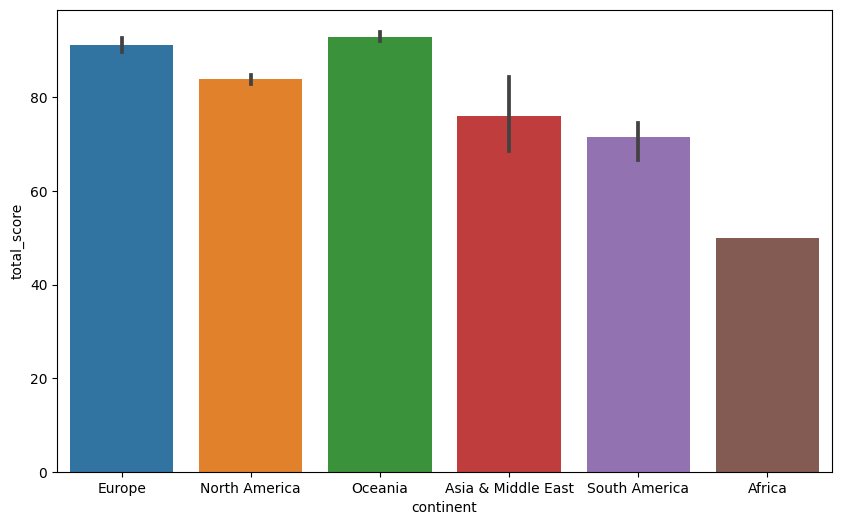

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'continent', y = 'total_score', data = df)

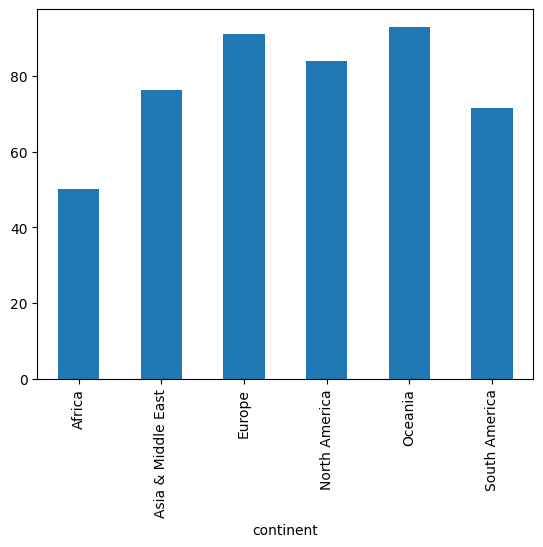

In [ ]:
df_countryscore = df.groupby(["continent"])["total_score"].mean()
df_countryscore.plot(kind="bar")

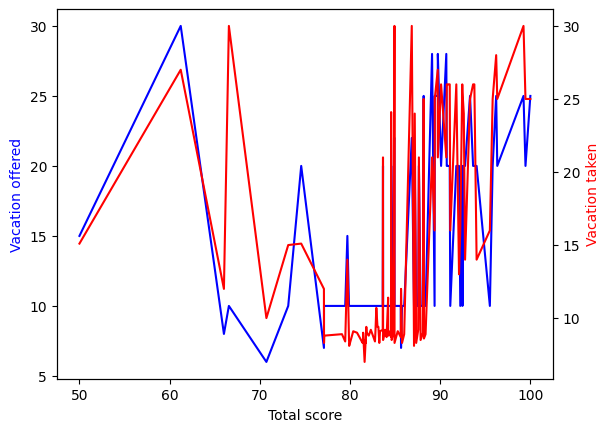

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['total_score'], df['vacdays_offered'], color="blue")  
ax.set_xlabel('Total score')
ax.set_ylabel('Vacation offered', color="blue")
#ax.ticks_params('y', colors="blue") #can take y or x argument
ax2 = ax.twinx()
ax2.plot(df['total_score'], df['vacdays_taken'], color="red")  
ax2.set_ylabel('Vacation taken', color="red")
#ax2.ticks_params('y', colors="red") #can take y or x argument
plt.show()

Text(0.5, 0, 'Total score')

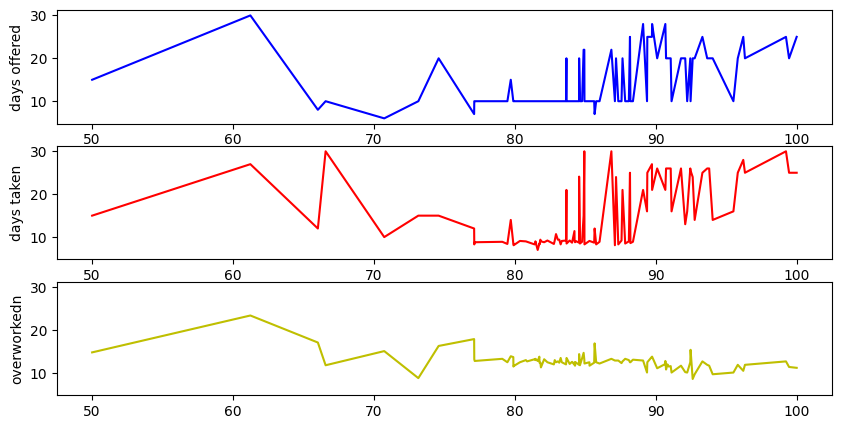

In [ ]:
fig, ax = plt.subplots(3, 1, sharey=True)
fig.set_size_inches([10,5])
ax[0].plot(df["total_score"], df["vacdays_offered"], color="b")
ax[1].plot(df["total_score"], df["vacdays_taken"], color="r")
ax[2].plot(df["total_score"], df["overworked_pcnt"], color="y")
ax[0].set_ylabel("days offered")
ax[1].set_ylabel("days taken")
ax[2].set_ylabel("overworkedn")

#Only the bottom table gets an x axis label
ax[1].set_xlabel("Total score")

Text(0.5, 0, 'Total score')

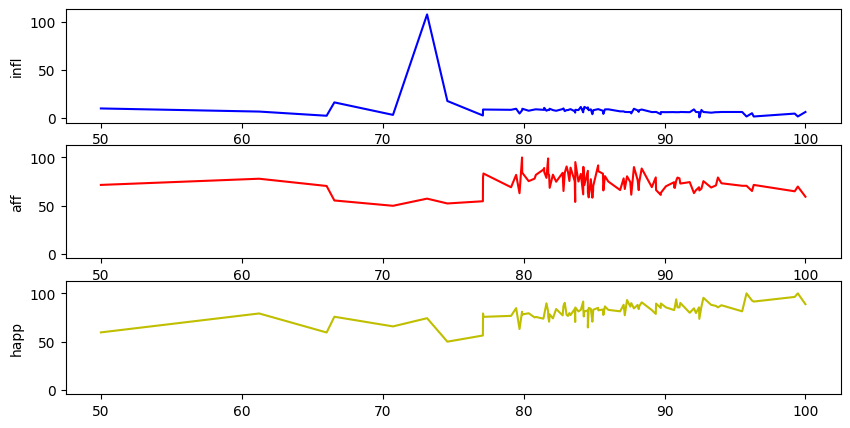

In [ ]:
fig, ax = plt.subplots(3, 1, sharey=True)
fig.set_size_inches([10,5])
ax[0].plot(df["total_score"], df["inflation_pcnt"], color="b")
ax[1].plot(df["total_score"], df["affordability"], color="r")
ax[2].plot(df["total_score"], df["happiness"], color="y")
ax[0].set_ylabel("infl")
ax[1].set_ylabel("aff")
ax[2].set_ylabel("happ")

#Only the bottom table gets an x axis label
ax[1].set_xlabel("Total score")

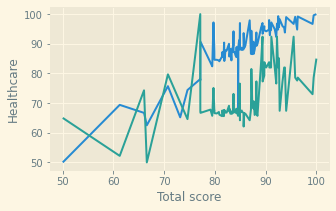

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches([5,3])
ax.plot(df["total_score"], df["healthcare"])
ax.plot(df["total_score"], df["mental_healthcare"])
ax.set_xlabel('Total score')
ax.set_ylabel('Healthcare')
plt.show()

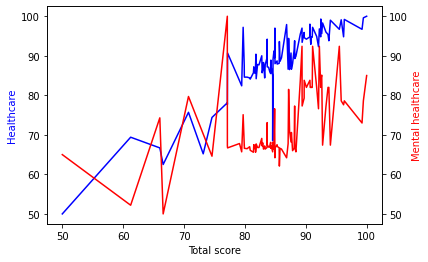

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['total_score'], df['healthcare'], color="blue")  
ax.set_xlabel('Total score')
ax.set_ylabel('Healthcare', color="blue")
#ax.ticks_params('y', colors="blue") #can take y or x argument
ax2 = ax.twinx()
ax2.plot(df['total_score'], df['mental_healthcare'], color="red")  
ax2.set_ylabel('Mental healthcare', color="red")
#ax2.ticks_params('y', colors="red") #can take y or x argument
plt.show()

Text(0.5, 0, 'Total score')

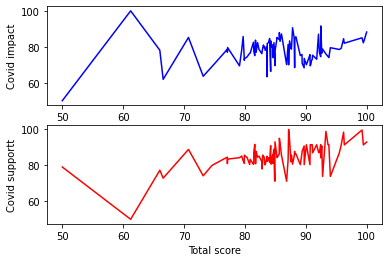

In [ ]:
fig, ax = plt.subplots(2, 1, sharey=True)

ax[0].plot(df["total_score"], df["covid_impact"], color="b")
ax[1].plot(df["total_score"], df["covid_support"], color="r")
ax[0].set_ylabel("Covid impact")
ax[1].set_ylabel("Covid support")

#Only the bottom table gets an x axis label
ax[1].set_xlabel("Total score")

Text(0.5, 0, 'Total score')

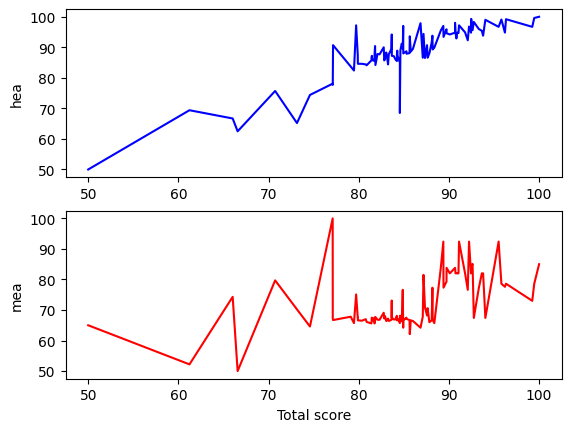

In [ ]:
fig, ax = plt.subplots(2, 1, sharey=True)

ax[0].plot(df["total_score"], df["healthcare"], color="b")
ax[1].plot(df["total_score"], df["mental_healthcare"], color="r")
ax[0].set_ylabel("hea")
ax[1].set_ylabel("mea")

#Only the bottom table gets an x axis label
ax[1].set_xlabel("Total score")

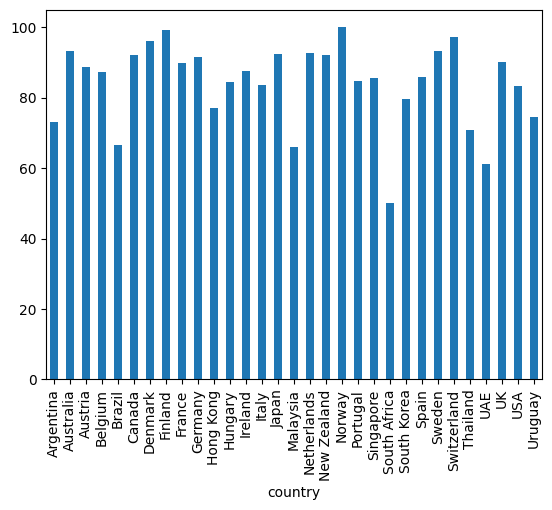

In [ ]:
df_countryscore = df.groupby(["country"])["total_score"].mean()
df_countryscore.plot(kind="bar")

# New Section

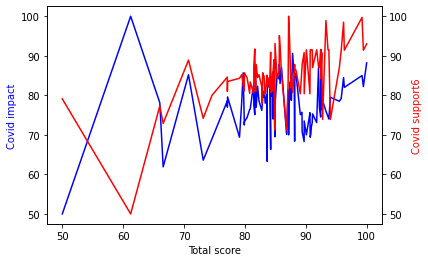

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['total_score'], df['covid_impact'], color="blue")  
ax.set_xlabel('Total score')
ax.set_ylabel('Covid impact', color="blue")
#ax.ticks_params('y', colors="blue") #can take y or x argument
ax2 = ax.twinx()
ax2.plot(df['total_score'], df['covid_support'], color="red")  
ax2.set_ylabel('Covid support6', color="red")
#ax2.ticks_params('y', colors="red") #can take y or x argument
plt.show()

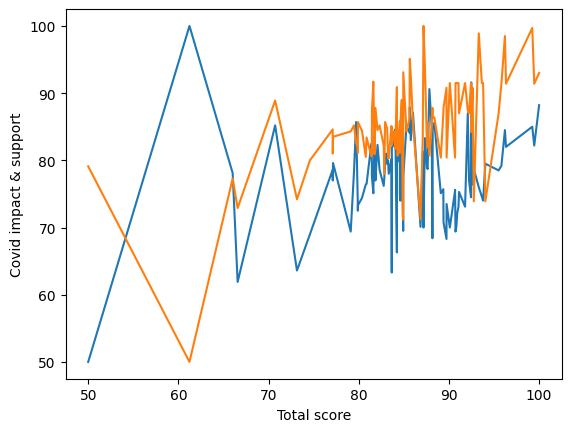

In [ ]:
plt.style.use("default")
fig, ax = plt.subplots()
ax.plot(df['total_score'], df['covid_impact'])
ax.plot(df['total_score'], df['covid_support'])    
ax.set_xlabel('Total score')
ax.set_ylabel('Covid impact & support')
# ax.legend()

plt.show()

fig.savefig("covid.jpg")


In [ ]:


#group data by product and display sales as line chart
health = df.groupby('wellness')['air_qual'].size()
health.plot.bar()

In [ ]:
df.groupby("total_score")["inflation_pcnt"].size()

total_score
50.00     1
61.23     1
66.02     1
66.57     1
70.73     1
         ..
96.21     1
96.33     1
99.24     1
99.46     1
100.00    1
Name: inflation_pcnt, Length: 97, dtype: int64

In [ ]:
ls

covid.png  sample_data/


# New Section

In [ ]:
outdoorsdf = df.groupby(["outdoor_space", "air_qual", "wellness"])
outdoorsdf

In [ ]:
pip install pycountry_convert


In [ ]:
import pycountry_convert as pct

#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 100 entries, 100.0 to 50.0
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               100 non-null    object 
 1   country            100 non-null    object 
 2   remotejob_pcnt     100 non-null    float64
 3   overworked_pcnt    100 non-null    float64
 4   vacdays_offered    100 non-null    int64  
 5   vacdays_taken      100 non-null    float64
 6   unemployment       100 non-null    float64
 7   multjob_pcnt       100 non-null    float64
 8   inflation_pcnt     100 non-null    float64
 9   parental_leave     100 non-null    float64
 10  covid_impact       100 non-null    float64
 11  covid_support      100 non-null    float64
 12  healthcare         100 non-null    float64
 13  mental_healthcare  100 non-null    float64
 14  inclusivity        100 non-null    float64
 15  affordability      100 non-null    float64
 16  happiness          

In [ ]:
for lab, row in df.iterrows():
  if 
  df.loc[lab, "name_lenght"] = len(row["country"])
print(df)


                     city       country  remotejob_pcnt  overworked_pcnt  \
total_score                                                                
100.00               Oslo        Norway           41.72             11.2   
99.46                Bern   Switzerland           44.86             11.4   
99.24            Helsinki       Finland           38.92             12.7   
96.33              Zurich   Switzerland           44.86             11.9   
96.21          Copenhagen       Denmark           41.42             10.5   
...                   ...           ...             ...              ...   
70.73             Bangkok      Thailand           16.84             15.1   
66.57           Sao Paulo        Brazil           25.65             11.8   
66.02        Kuala Lumpur      Malaysia           30.70             17.1   
61.23               Dubai           UAE           28.89             23.4   
50.00           Cape Town  South Africa           26.06             14.8   

           

# New Section

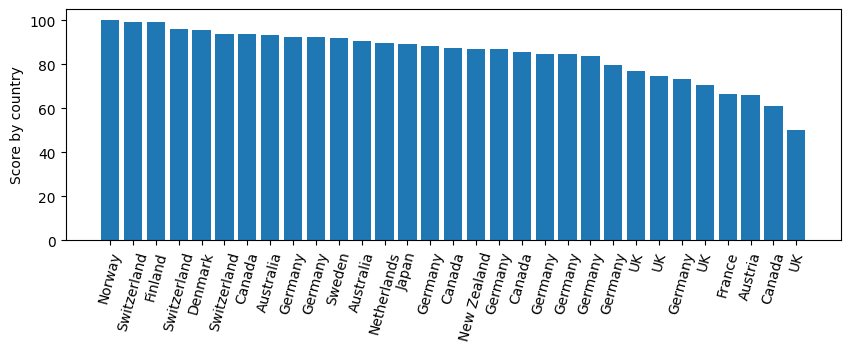

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches([10, 3])
ax.bar(df['country'], df["total_score"])
ax.set_xticklabels(df['country'], rotation=75)
ax.set_ylabel("Score by country")
plt.show()

['Norway' 'Switzerland' 'Finland' 'Denmark' 'Canada' 'Australia' 'Germany'
 'Sweden' 'Netherlands' 'Japan' 'New Zealand' 'UK' 'France' 'Austria'
 'USA' 'Ireland' 'Belgium' 'Spain' 'Singapore' 'Portugal' 'Hungary'
 'Italy' 'South Korea' 'Hong Kong' 'Uruguay' 'Argentina' 'Thailand'
 'Brazil' 'Malaysia' 'UAE' 'South Africa']


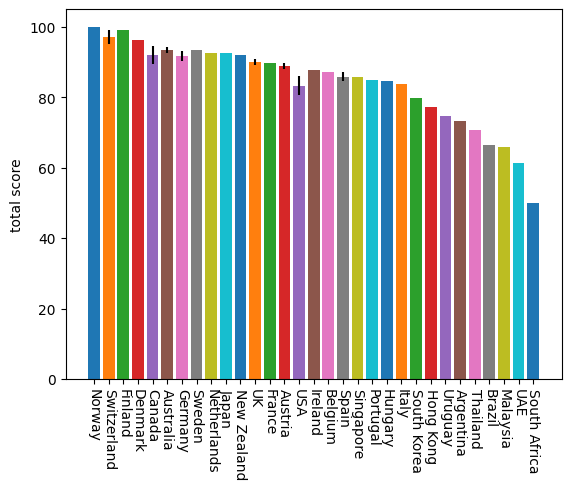

In [ ]:
countries = df["country"].unique()
print(countries)

fig, ax = plt.subplots()

for country in countries:
  country_df = df[df["country"] == country]
  ax.bar(country, country_df["total_score"].mean(),
         yerr=country_df["total_score"].std())
ax.set_ylabel("total score")
ax.set_xticklabels(countries, rotation=-90)
plt.show()

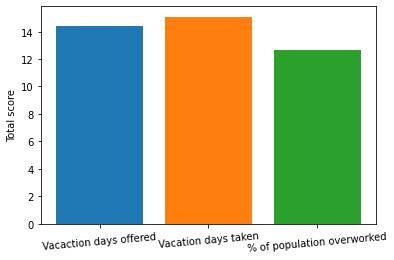

In [ ]:
fig, ax = plt.subplots()
ax.bar("Vacation days offered", df["vacdays_offered"].mean())
ax.bar("Vacation days taken", df["vacdays_taken"].mean())
ax.bar("Overworked population", df["overworked_pcnt"].mean())
ax.set_xticklabels(labels=('Vacaction days offered', 'Vacation days taken', '% of population overworked'), rotation=5)
ax.set_ylabel("Total score")
plt.show()

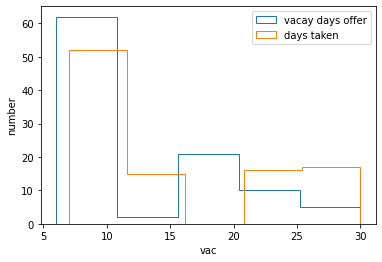

In [ ]:
fig, ax = plt.subplots()
ax.hist(df["vacdays_offered"], label="vacay days offer", bins=5, histtype="step")
ax.hist(df["vacdays_taken"], label="days taken", bins=5, histtype="step")
ax.set_xlabel("vac")
ax.set_ylabel("number")
ax.legend()
plt.show()

No handles with labels found to put in legend.


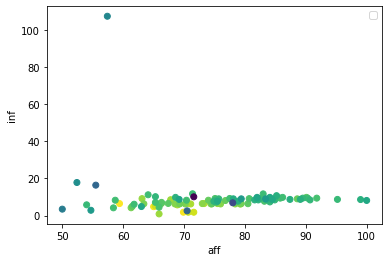

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["affordability"], df["inflation_pcnt"], c=df["total_score"])
ax.set_xlabel("aff")
ax.set_ylabel("inf")
ax.legend()
plt.show()

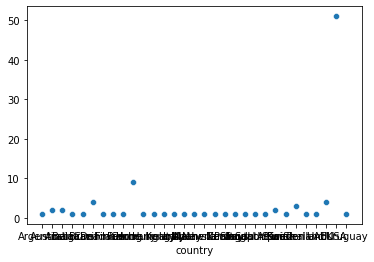

In [ ]:
# df.groupby(['country'=="USA"])
res = df.groupby(['country']).size()
sns.scatterplot(x  = res.index, y = res.values)

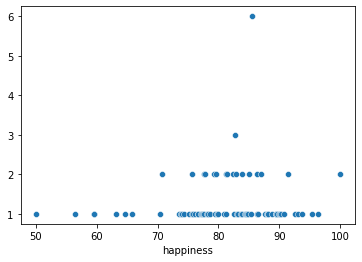

In [ ]:
import seaborn as sns
result = df.groupby(['happiness']).size()
 
# plot the result
sns.scatterplot(x = result.index, y = result.values)

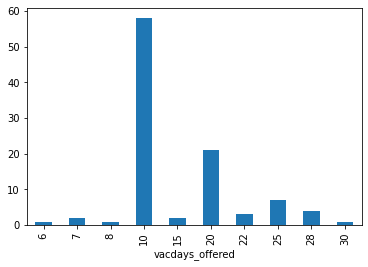

In [ ]:
df.groupby(['vacdays_offered']).size().plot(kind = "bar")

In [ ]:
df.groupby(['country']).plot(kind="bar")

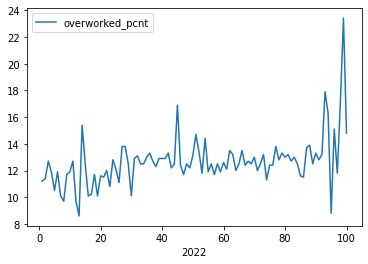

In [ ]:
df[['overworked_pcnt']].plot()

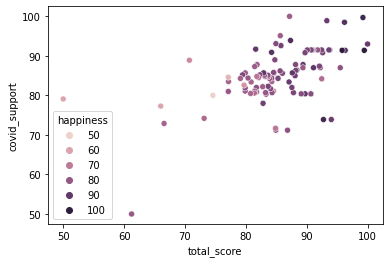

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.scatterplot(data=df, x='total_score', y='overworked_pcnt', hue="happiness")

sns.scatterplot(data=df, x='total_score', y='covid_support', hue="happiness")

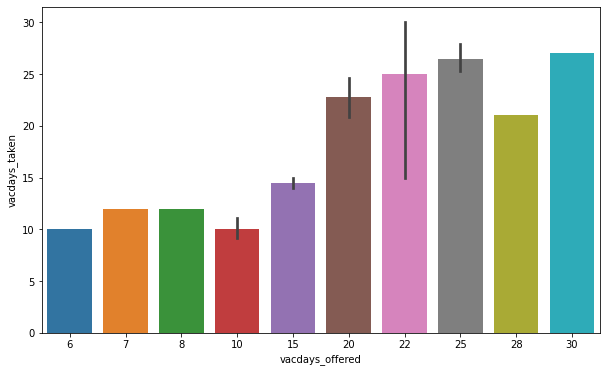

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'vacdays_offered', y = 'vacdays_taken', data = df)

# df.plot(kind='line',x='vacdays_offered',y='overworked_pcnt',color='yellow')
# # plt.bar('sunshine)', 'life_expect', data=dfsun)
# plt.show()

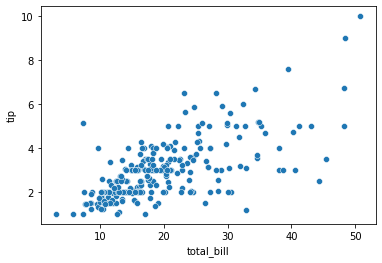

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip');

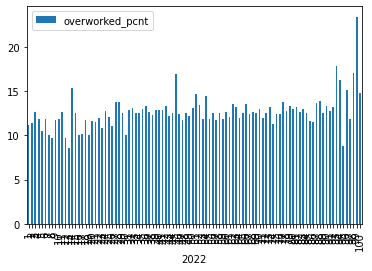

In [ ]:
df[['overworked_pcnt']].plot.bar()

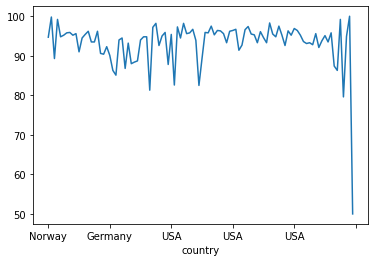

In [ ]:
# countries_grouped = df.groupby(['country']).mean()
# print(countries_grouped)

# df.set_index('country', inplace=True)
# df[['healthcare']].plot()

#sets country as the index and plots healthcare

# unemployment_grouped = df.groupby(['unemployment']).mean()
df['unemployment'].plot()

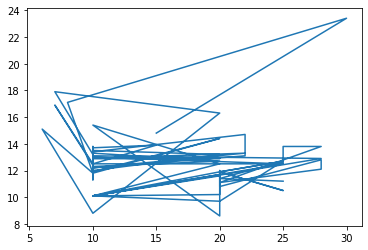

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.plot('Minimum Vacations Offered (Days)','Overworked Population')
#plt.show()

fig, ax = plt.subplots()
ax.plot(df['vacdays_offered'], df['overworked_pcnt'])
plt.show()


In [ ]:
df.isnull().sum()

2022                 0
city                 0
country              0
remotejob_pcnt       0
overworked_pcnt      0
vacdays_offered      0
unemployment         0
multjob_pcnt         0
inflation_pcnt       0
parental_leave       0
covid_impact         0
covid_support        0
healthcare           0
mental_healthcare    0
inclusivity          0
affordability        0
happiness            0
city_safety          0
outdoor_space        0
air_qual             0
wellness             0
total_score          0
dtype: int64

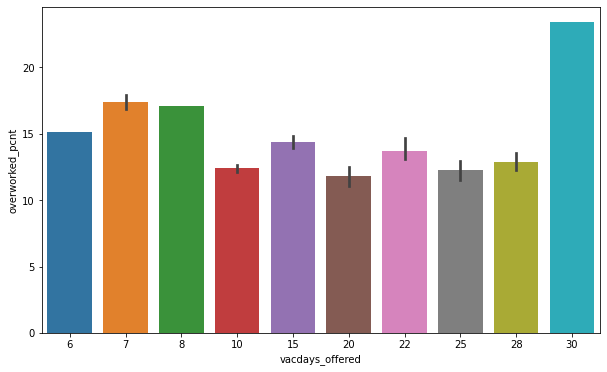

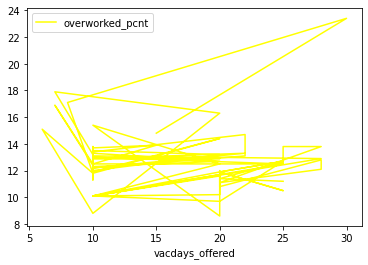

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'vacdays_offered', y = 'overworked_pcnt', data = df)

df.plot(kind='line',x='vacdays_offered',y='overworked_pcnt',color='yellow')
# plt.bar('sunshine)', 'life_expect', data=dfsun)
plt.show()

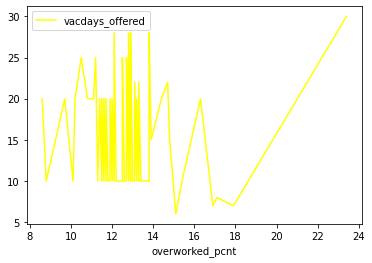

In [ ]:
dfwork=df.sort_values(["overworked_pcnt", "vacdays_offered"])
dfwork.plot(kind='line',x='overworked_pcnt',y='vacdays_offered',color='yellow')

